In [0]:
from google.colab import drive
drive.mount('/content/mydrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/mydrive/


## Import modules

## Importing the dataset from keras
### Keras includes special support for loading some of the benchmark datasets. One is the CIFAR-10 dataset

In [0]:
import sys
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from keras.models import load_model
from keras import optimizers

print('Python ' + sys.version)
print('numpy: ' + np.__version__)

Using TensorFlow backend.


Python 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
numpy: 1.14.6


In [0]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
from keras.datasets import cifar10

## Load the dataset

#### If you never had used CIFAR-10 before with keras, it will download the dataset first. The next time you resort to using the dataset again, it will use the downloaded copy.

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 34s 0us/step


In [0]:
type(X_train)

numpy.ndarray

In [0]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
y_train.shape

(50000, 1)

In [0]:
X_test.shape

(10000, 32, 32, 3)

In [0]:
y_test.shape

(10000, 1)

## Visualising the dataset
#### Displaying the first 9 images

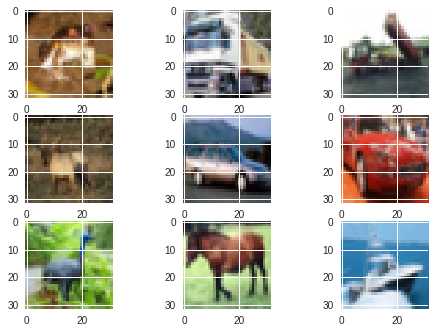

In [0]:
for i in range(0, 9):
    plt.subplot(3, 3, 1+i)
    plt.imshow(X_train[i])
plt.show()

# Data Preprocessing

## Feature scaling is a must in Deep Learning networks
#### Scaling the dataset features to have values between 0 and 1

In [0]:
# storing the 1st image before feature scaling so that it can be later\
# used for sanity checks
X_train_0 = X_train[0]

# Feature scaling
X_train = X_train/255
X_test = X_test/255

## One-hot encoding 
The labels in the dataset are numerical values which inherently are ordinal. This ordinality can skew the weights, for eg, a label 6 will skew the weights of the ANN more towards itself than the other lower values, ie, 0, 1, 2, 3, 4... ANN's work in such a way that this happens and may not create a nice model. So we one-hot encode the labels into a vector of 0's and 1's. The length of each of such vector will be equal to the number of classes and each vector will have a 1 at only one position. For eg, if the categories are dog, cat and lizard, the one-hot encoding will have a vector for each example, each of such vector will be of length 3 (since number of classes = 3). If an example has label 'cat', then the one-hot encoded vector "may be" [1,0,0], if an example has label 'dog', the one-hot encoded vector "may be" [0,1,0] and for a 'lizard' it "may be" [0,0,1]. I have explicitly mentioned "may be" because the position of 1 in the vector for each category depends on the underlying implementation of the one-hot encoding done, ie, what I have mentioned is according to an implemention that assigns one-hot encoded vectors based on lexicographical order, other implementation may assign these vectors differently.

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [0]:
X_train_0.shape

(32, 32, 3)

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


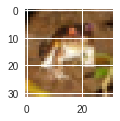

In [0]:
print(y_train.shape)

# printing one-hot encoded vector for 0th label (which is 6)
print(y_train[0])

# from cifar-10 dataset webpage, we can see that label 6 is for frog
# checking if X_train[0] is a frog's image
plt.subplot(3,3,1) # doing this to plot image in a smaller grid so that\
                # the 32x32 image looks a bit clearer
plt.imshow(X_train_0)
plt.show()

##### It does look like a frog

# Building the All-CNN model
#### Reference used-  All-CNN paper (https://arxiv.org/abs/1412.6806)

Model - C (taken from the paper, out of three models, this model performed the best)
* Input 32 × 32 RGB image
* 3 × 3 conv. 96 ReLU
* 3 × 3 conv. 96 ReLU
* 3 × 3 conv. 96 ReLU stride 2
* 3 × 3 conv. 192 ReLU
* 3 × 3 conv. 192 ReLU
* 3 × 3 conv. 96 ReLU stride 2
* 3 × 3 conv. 192 ReLU
* 1 × 1 conv. 192 ReLU
* 1 × 1 conv. 10 ReLU
* global averaging over 6 × 6 spatial dimensions
* 10 or 100-way softmax

### Importing necessary libraries to build layers of the CNN

In [0]:
from keras.models import Sequential
from keras.layers import Dropout # used for regularisation to prevent overfitting which is common with ANNs
from keras.layers import Convolution2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Activation

### Implement the All-CNN function

In [0]:
#### <font color='green'>Proposed Model</font>

In [0]:
def proposed_model(weights = None):
    # Initialising the ANN as a sequence of layers
    classifier = Sequential()
    
    classifier.add(Convolution2D(96, (3, 3), input_shape = (32, 32, 3), padding = 'same', activation = 'relu'))
    classifier.add(Convolution2D(96, (3, 3), activation = 'relu'))
    classifier.add(Convolution2D(192, (3, 3), activation = 'relu', strides=2))
    
    classifier.add(Convolution2D(192, (3, 3), activation = 'relu'))
    classifier.add(Convolution2D(192, (3, 3), activation = 'relu'))
    classifier.add(Convolution2D(192, (3, 3), activation = 'relu', strides=2))
    
    classifier.add(Convolution2D(192, (3, 3), padding = 'same', activation = 'relu'))
    
    classifier.add(Convolution2D(192, (1, 1), padding = 'valid', activation = 'relu'))
    
    classifier.add(Convolution2D(10, (1, 1), padding = 'valid', activation = 'relu'))
    
    classifier.add(GlobalAveragePooling2D())
    
    classifier.add(Activation('softmax'))
    
    if weights:
        classifier.load_weights(weights)
    
    return classifier
    

In [0]:
import os

if(os.path.exists('/content/mydrive/My Drive/Colab Notebooks/MyClassifier_proposed.h5')):
    classifier = load_model('/content/mydrive/My Drive/Colab Notebooks/MyClassifier_proposed.h5')

else:
    classifier = proposed_model()
    # adam is a stochastic gradient descent algorithm
    adam = optimizers.Adam(lr = 0.0001)
    classifier.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    print(classifier.summary())
    
    # not using the first raw as the validation set for fitting the model, this raw will be used to test the final
    # model to check how well the model predicts
    classifier.fit(X_train, y_train, validation_data = (X_test[1:], y_test[1:]), epochs = 100, batch_size = 32)
    classifier.save('/content/mydrive/My Drive/Colab Notebooks/MyClassifier_proposed.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
X_test_ex = X_test[0]
y_test_ex = y_test[0]

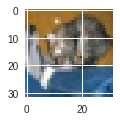

In [0]:
plt.subplot(331)
plt.imshow(X_test_ex)
plt.show()

In [0]:
X_test_ex.shape

(32, 32, 3)

In [0]:
X_test_ex = np.expand_dims(X_test_ex, axis=0)

In [0]:
# y_test_ex_pred = classifier.predict_classes([X_test_ex])
y_test_ex_pred = classifier.predict([X_test_ex])

In [0]:
print('y_pred_ex = ' + str(y_test_ex))
print('y_pred_ex_pred = ' + str(y_test_ex_pred))

y_pred_ex = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
y_pred_ex_pred = [[1.6983778e-13 3.8873346e-10 8.4751771e-16 9.9999988e-01 2.2266162e-16
  1.8693065e-09 1.5107287e-07 3.9016667e-16 1.7777089e-14 8.6213779e-12]]


In [0]:
print(y_test_ex)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [0]:
print(np.argmax(y_test_ex_pred))

3
